# Delta Function Appeal

This notebook presents an agent-based model that simulates the propagation of a disease through a network.
It demonstrates how to use the [agentpy](https://agentpy.readthedocs.io) package to create and visualize networks, use the interactive module, and perform different types of sensitivity analysis. 

In [1]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd
import os
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython

from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold

import pickle

np.random.seed(42)

In [2]:
path = os.path.abspath(os.getcwd())

with open( ("../data/distributions_init.pickle"), "rb") as f:
        d_fnw = pickle.load(f)

print(d_fnw)
path

[0.14776571 0.15524301 0.14651949 0.12978458 0.10770874 0.08741321
 0.07317073 0.06391312 0.05305323 0.03542816]


'/Users/uni/Documents/Git/abm/basic/notebooks'

In [3]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function
from generate_data import generate_init
from clf import  classifier_train, classifier_train_star

from agent import Person

from model import TaxFraudModel




## optimize classifier

To run our model, we define a dictionary with our parameters. 
We then create a new instance of our model, passing the parameters as an argument, 
and use the method :func:`Model.run` to perform the simulation and return it's output. 

In [4]:
x,y = generate_init(star_version = 'is2', synth_data_acc = 0.8, abm_eval = 'GT', train_clf = True, n = 20000)
classifier_train_star(x, y)
print(x)
# with open("clf2.pkl", "rb") as f:
#     clf = pickle.write(f)   



0.809
dpd 0.93266055505171
eod 0.9313844412097687
dpd 0.9565295863327977
eod 0.9031311154598826
[[0, 1, 0.33805668016194335, 0.3745401188473625, 0], [0, 1, 0.0033738191632928477, 0.7319939418114051, 1], [0, 1, 0.0033738191632928477, 0.15601864044243652, 1], [1, 1, 0.0026990553306342783, 0.05808361216819946, 1], [1, 1, 0.0026990553306342783, 0.6011150117432088, 0], [0, 1, 0.5168690958164642, 0.020584494295802447, 1], [1, 0, 0.16329284750337383, 0.8324426408004217, 0], [0, 1, 0.04251012145748988, 0.18182496720710062, 0], [0, 0, 0.407557354925776, 0.3042422429595377, 0], [1, 0, 0.09784075573549258, 0.43194501864211576, 0], [0, 1, 0.5168690958164642, 0.6118528947223795, 1], [1, 1, 0.16464237516869096, 0.29214464853521815, 0], [0, 1, 1.0, 0.45606998421703593, 1], [0, 1, 0.33805668016194335, 0.19967378215835974, 1], [0, 0, 0.33738191632928477, 0.5924145688620425, 1], [0, 1, 1.0, 0.6075448519014384, 1], [0, 0, 0.2786774628879892, 0.06505159298527952, 1], [0, 1, 0.33805668016194335, 0.96563203

In [5]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.8, # accuracy of fraud prdediction
#     'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': 'pretrained', # None, 'hist'
#     'expi': None,
#     'fraud_det': 0,
#     'fairness_metrics' : True
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel_baseline(parameters)
# exp = ap.Experiment(VirusModel_baseline, sample, iterations =20, record = True)
# results_baseline = exp.run() 


    
# df_baseline = results_baseline['variables']['Person']



In [6]:
# df_baseline = results_baseline['variables']['Person']


In [7]:
# with open("data/expis/fraud_expi_false_mpl_20run.pkl", "wb") as f:
#         pickle.dump(results_baseline, f)

In [8]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.6, # accuracy of fraud prdediction
#     'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': None, # None, 'hist'
#     'expi': None,
#     'fraud_det': 0,
#     'fairness_metrics' : True
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel_baseline(parameters)
# exp = ap.Experiment(VirusModel_baseline, sample, iterations =20, record = True)
# r_baseline = exp.run() 

    
# df_b = r_baseline['variables']['Person']

In [9]:
# with open("data/expis/fraud_expi_false_prob_20run.pkl", "wb") as f:
#         pickle.dump(r_baseline, f)

In [10]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.6, # accuracy of fraud prdediction
#     'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': 'pretrained', # None, 'hist'
#     'expi': 'appeal',
#     'fraud_det': 0,
#     'fairness_metrics' : True
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel_baseline(parameters)
# exp = ap.Experiment(VirusModel_baseline, sample, iterations =20, record = True)
# r_baseline = exp.run() 

    
# df_b = r_baseline['variables']['Person']

In [11]:
# with open("data/expis/fraud_expi_appeal_mlp_20run.pkl", "wb") as f:
#         pickle.dump(r_baseline, f)

In [12]:
parameters = {
    'my_parameter':42,
    'agents':100,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.6, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': None, # None, 'hist'
    'expi': 'appeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
}
sample = ap.Sample(parameters, n=1)
model_baseline = VirusModel_baseline(parameters)
exp = ap.Experiment(VirusModel_baseline, sample, iterations =1, record = True)
r_baseline = exp.run() 

    


NameError: name 'VirusModel_baseline' is not defined

In [ ]:
df_baseline = r_baseline['variables']['Person']

In [ ]:
def transform_pd(df_baseline):

    df_baseline['misclassifications'] = abs(df_baseline['fraud_pred'] - df_baseline['fraud'])
    df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

    df_baseline.head()
    df_baseline = df_baseline[df_baseline.fraud_pred != -1]
    df_baseline[df_baseline['misclassifications'] == 0]

    df_baseline['intersect'] = list(df_baseline['gender'])
    mask1 = ((df_baseline['gender'] == 0) & (df_baseline['race'] == 0))
    df_baseline.loc[mask1, 'intersect'] = 'fw'
    mask2 = ((df_baseline['gender'] == 1) & (df_baseline['race'] == 0))
    df_baseline.loc[mask2, 'intersect'] = 'mw'

    mask3 = ((df_baseline['gender'] == 0) & (df_baseline['race'] == 1))
    df_baseline.loc[mask3, 'intersect'] = 'fnw'

    mask4 = ((df_baseline['gender'] == 1) & (df_baseline['race'] == 1))
    df_baseline.loc[mask4, 'intersect'] = 'mnw'

    return df_baseline

Intersectionality

In [ ]:
df_baseline = transform_pd(df_baseline)
df_baseline

/var/folders/_3/m4zxq5yx589d0965c6l5j1q80000gp/T/ipykernel_15068/1436114599.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['intersect'] = list(df_baseline['gender'])


wealth   health  fraud_pred  fraud  race  gender  convicted  \
obj_id t                                                                  
1      1     1.000  0.37454           0      0     0       1          0   
       2     1.000  0.37454           0      0     0       1          0   
       3     1.000  0.37454           0      1     0       1          0   
       4     0.981  0.37454           1      0     0       1          1   
       5     1.000  0.37454           0      0     0       1          1   
...            ...      ...         ...    ...   ...     ...        ...   
100    96    0.000  0.37454           1      1     0       0          1   
       97    0.000  0.37454           1      0     0       0          1   
       98    0.000  0.37454           1      1     0       0          1   
       99    0.000  0.37454           1      1     0       0          1   
       100   0.000  0.37454           1      0     0       0          1   

            eod_gender  eod_race  dpd_gender  dpd_race  misclassifications  \
obj_id t                                                                     
1      1      0.928571  0.560000    0.928571  0.560000                   0   
       2      0.855556  0.754717    0.855556  0.754717                   0   
       3      0.535117  0.888889    0.535117  0.888889                   1   
       4      0.641026  0.857143    0.641026  0.857143                   1   
       5      0.597403  0.875000    0.597403  0.875000                   0   
...                ...       ...         ...       ...                 ...   
100    96     0.847059  0.937500    0.847059  0.937500                   0   
       97     0.695652  0.775194    0.695652  0.775194                   1   
       98     0.719697  0.540541    0.719697  0.540541                   0   
       99     0.795455  0.788462    0.795455  0.788462                   0   
       100    0.640000  0.812500    0.640000  0.812500                   1   

           intersect  
obj_id t              
1      1          mw  
       2          mw  
       3          mw  
       4          mw  
       5          mw  
...              ...  
100    96         fw  
       97         fw  
       98         fw  
       99         fw  
       100        fw  

[10000 rows x 13 columns]

In [ ]:
def viz2(data, x, y):
    fig, ax = plt.subplots()

    sns.lineplot(ax = ax,
                 data = data,
                 x = x,
                 y = y,
                 marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)

    plt.show()

In [ ]:
def viz(data, x, y, hue, title = None):
    fig, ax = plt.subplots()

    sns.lineplot(ax = ax,
                 data = data,
                 x = x,
                 y = y,
                 hue = hue,
                 marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)
    plt.title(title)

    plt.show()

In [ ]:
df_baseline

wealth   health  fraud_pred  fraud  race  gender  convicted  \
obj_id t                                                                  
1      1     1.000  0.37454           0      0     0       1          0   
       2     1.000  0.37454           0      0     0       1          0   
       3     1.000  0.37454           0      1     0       1          0   
       4     0.981  0.37454           1      0     0       1          1   
       5     1.000  0.37454           0      0     0       1          1   
...            ...      ...         ...    ...   ...     ...        ...   
100    96    0.000  0.37454           1      1     0       0          1   
       97    0.000  0.37454           1      0     0       0          1   
       98    0.000  0.37454           1      1     0       0          1   
       99    0.000  0.37454           1      1     0       0          1   
       100   0.000  0.37454           1      0     0       0          1   

            eod_gender  eod_race  dpd_gender  dpd_race  misclassifications  \
obj_id t                                                                     
1      1      0.928571  0.560000    0.928571  0.560000                   0   
       2      0.855556  0.754717    0.855556  0.754717                   0   
       3      0.535117  0.888889    0.535117  0.888889                   1   
       4      0.641026  0.857143    0.641026  0.857143                   1   
       5      0.597403  0.875000    0.597403  0.875000                   0   
...                ...       ...         ...       ...                 ...   
100    96     0.847059  0.937500    0.847059  0.937500                   0   
       97     0.695652  0.775194    0.695652  0.775194                   1   
       98     0.719697  0.540541    0.719697  0.540541                   0   
       99     0.795455  0.788462    0.795455  0.788462                   0   
       100    0.640000  0.812500    0.640000  0.812500                   1   

           intersect  
obj_id t              
1      1          mw  
       2          mw  
       3          mw  
       4          mw  
       5          mw  
...              ...  
100    96         fw  
       97         fw  
       98         fw  
       99         fw  
       100        fw  

[10000 rows x 13 columns]

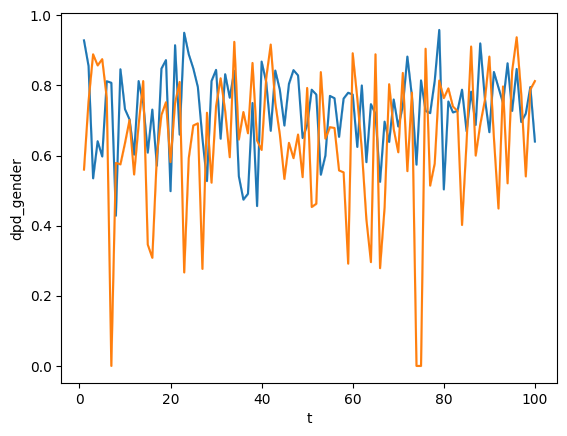

In [ ]:

fig, ax = plt.subplots()

sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['dpd_gender'])

sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['eod_race'])
# plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

<AxesSubplot: xlabel='intersect', ylabel='Count'>

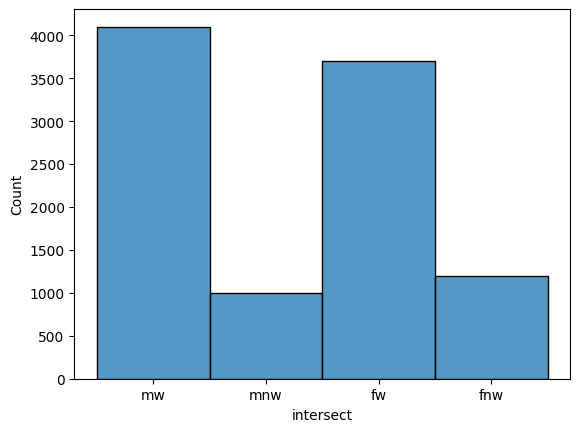

In [ ]:
sns.histplot(df_baseline['intersect'])

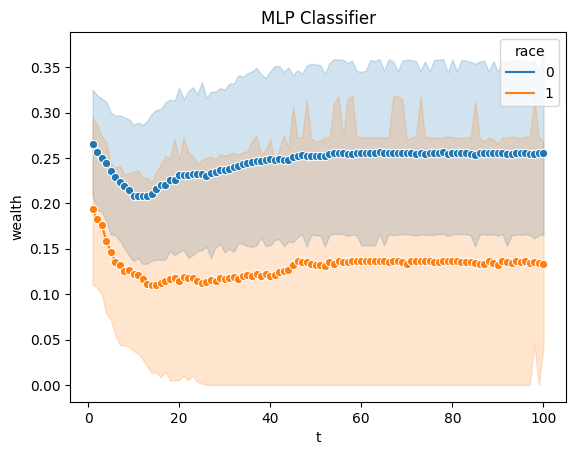

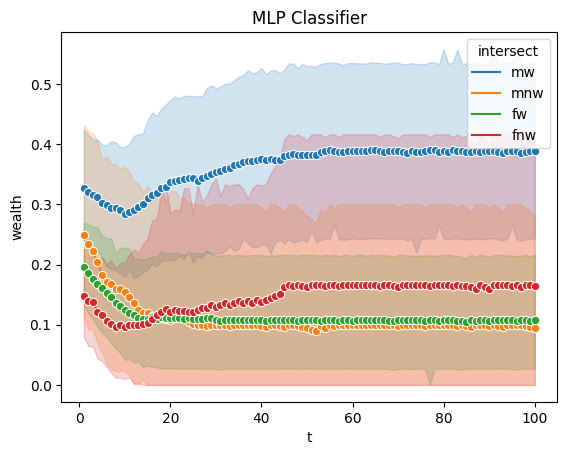

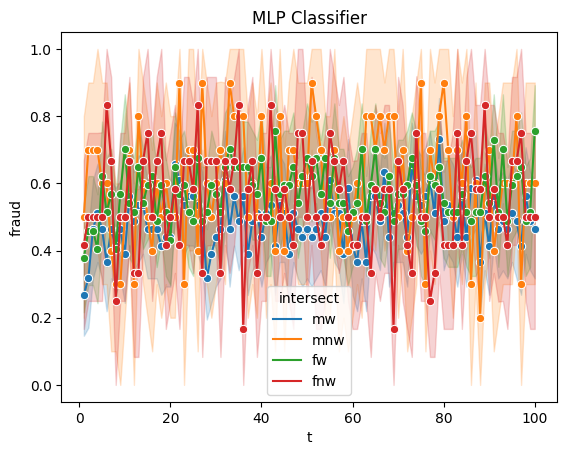

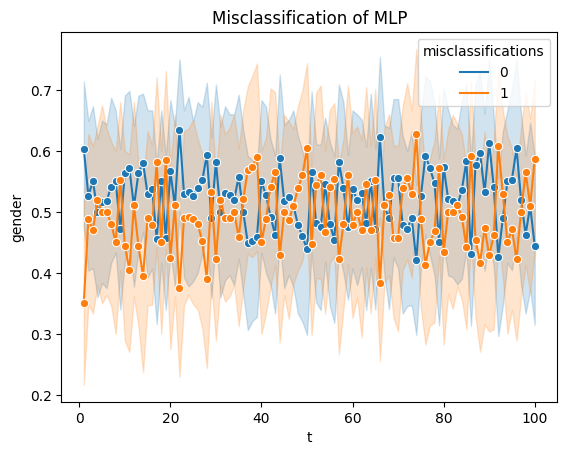

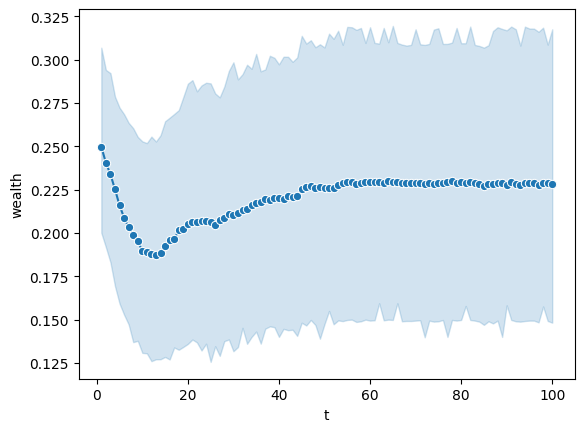

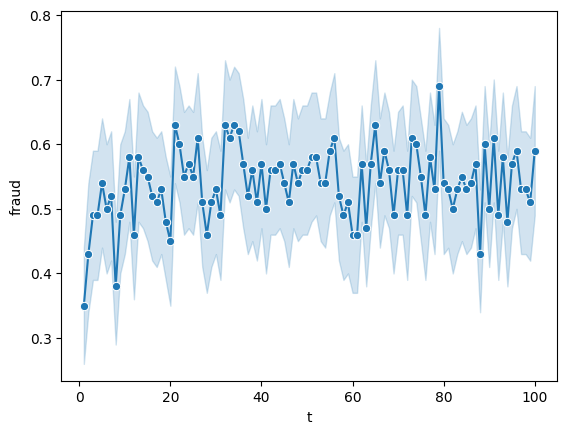

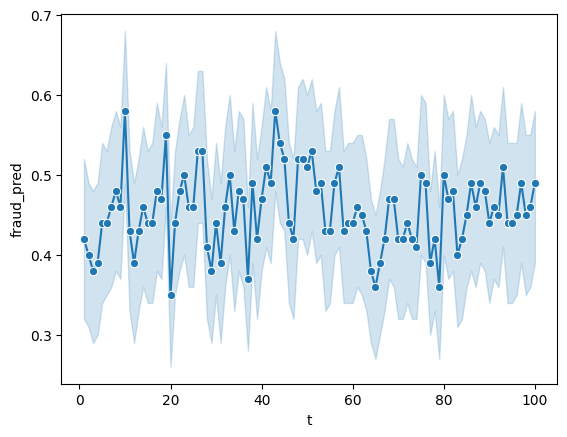

In [ ]:
viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['race'], title= 'MLP Classifier') #, df_baseline['convicted'])

viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])

viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])


viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['gender'], (df_baseline['misclassifications']), title= 'Misclassification of MLP') #, df_baseline['convicted'])

viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud_pred'])





# fig, ax = plt.subplots()

# sns.violinplot(ax = ax,
#                 data = df_baseline,
#                 x = df_baseline.index.get_level_values('t'),
#                 y = df_baseline['wealth'], cut = True)

# # plt.ylim(0,0.2)
# plt.xlim(30, 60)
# # plt.title(title)

# plt.show()

# viz(df_baseline, df_baseline.index.get_level_values('t'), abs(df_baseline['fraud'] - df_baseline['fraud_pred']), df_baseline['race'])#, df_baseline['fraud'])

In [ ]:

# fig, ax = plt.subplots()

# sns.lineplot(ax = ax,
#                 data = df_baseline,
#                 x = df_baseline.index.get_level_values('t'),
#                 y = df_baseline['wealth'],
#                 hue =df_baseline['fraud_pred'],
#                 marker = 'o' )

# sns.lineplot(ax = ax,
#                 data = df_baseline,
#                 x = df_baseline.index.get_level_values('t'),
#                 y = df_baseline['wealth'],
#                 hue =df_baseline['fraud'],
#                 marker = 'x' )

# # plt.ylim(0,0.2)
# plt.xlim(0,10)
# plt.title('title')

In [ ]:
# create baseline value fraud prediction medium income

df_b1 = df_baseline.iloc[(df_baseline['fraud_pred'] == 1).values] 
baseline1 = df_b1.groupby(level='t').mean()
# df_b
df_b0 = df_baseline.iloc[(df_baseline['fraud_pred'] == 0).values] 
baseline0 = df_b0.groupby(level='t').mean()

baseline0
df_b0
df_baseline.head(400)
baseline1
# df_x1 = df.iloc[(df_baseline['fraud_pred'] == 1).values] 
# df_wb1 = df_x1['wealth'] - baseline1['wealth']
# df_x1['wealth'] = df_wb1




# df_x0 = df_baseline.iloc[(df_baseline['fraud_pred'] == 0).values] 
# df_wb0 = df_x0['wealth'] - baseline0['wealth']
# df_x0['wealth'] = df_wb0

# df_xb = pd.concat([df_x0, df_x1])

# df_xb

,wealth,health,fraud_pred,fraud,race,gender,convicted,eod_gender,eod_race,dpd_gender,dpd_race,misclassifications
t,,,,,,,,,,,,
1,0.258912,0.37454,1.0,0.486577,0.151007,0.493289,1.0,0.745614,0.686172,0.745614,0.686172,0.513423
2,0.234695,0.37454,1.0,0.531561,0.149502,0.524917,1.0,0.897263,0.618468,0.897263,0.618468,0.468439
3,0.215015,0.37454,1.0,0.555172,0.155172,0.506897,1.0,0.824859,0.642093,0.824859,0.642093,0.444828
4,0.213525,0.37454,1.0,0.516779,0.151007,0.493289,1.0,0.778921,0.547466,0.778921,0.547466,0.483221
5,0.198239,0.37454,1.0,0.526502,0.169611,0.494700,1.0,0.779367,0.773864,0.779367,0.773864,0.473498
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.124271,0.37454,1.0,0.527027,0.168919,0.496622,1.0,0.768932,0.663306,0.768932,0.663306,0.472973
97,0.210198,0.37454,1.0,0.502591,0.191710,0.502591,1.0,0.798741,0.882176,0.798741,0.882176,0.497409
98,0.068981,0.37454,1.0,0.617886,0.203252,0.394309,1.0,0.439429,0.842246,0.439429,0.842246,0.382114


In [ ]:
parameters = {
    'my_parameter':42,
    'agents':100,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.6, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': None, # None, 'hist'
    'expi': 'apppeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
    
}
sample = ap.Sample(parameters, n=1)
model_baseline = VirusModel_baseline(parameters)
exp = ap.Experiment(VirusModel_baseline, sample, iterations =5, record = True)
r_baseline = exp.run() 

# with open("data/expis/fraud_1.pkl", "wb") as f:
#         pickle.dump(results_baseline, f)
    
df_b = r_baseline['variables']['Person']


Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:13:56.193210


In [ ]:
df_b = transform_pd(df_b)
df_b

/var/folders/_3/m4zxq5yx589d0965c6l5j1q80000gp/T/ipykernel_15068/1436114599.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['intersect'] = list(df_baseline['gender'])


wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         1      1    0.115957  0.37454           1      0     0       1   
                 2    0.066392  0.37454           1      0     0       1   
                 3    0.066832  0.37454           0      0     0       1   
                 4    0.067279  0.37454           0      0     0       1   
                 5    0.067732  0.37454           0      1     0       1   
...                        ...      ...         ...    ...   ...     ...   
4         100    96   0.000000  0.37454           1      1     0       1   
                 97   0.000000  0.37454           0      1     0       1   
                 98   0.000000  0.37454           1      0     0       1   
                 99   0.000000  0.37454           0      1     0       1   
                 100  0.000000  0.37454           0      0     0       1   

                      convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                            
0         1      1            1    0.842105  0.666667    0.842105  0.666667   
                 2            1    0.793333  0.720000    0.793333  0.720000   
                 3            1    0.738889  0.875000    0.738889  0.875000   
                 4            1    0.566434  0.190476    0.566434  0.190476   
                 5            1    0.539216  0.851351    0.539216  0.851351   
...                         ...         ...       ...         ...       ...   
4         100    96           1    0.659498  0.275000    0.659498  0.275000   
                 97           1    0.375000  0.728571    0.375000  0.728571   
                 98           1    0.848485  0.555556    0.848485  0.555556   
                 99           1    0.857143  0.500000    0.857143  0.500000   
                 100          1    0.487179  0.634615    0.487179  0.634615   

                      misclassifications intersect  
iteration obj_id t                                  
0         1      1                     1        mw  
                 2                     1        mw  
                 3                     0        mw  
                 4                     0        mw  
                 5                     1        mw  
...                                  ...       ...  
4         100    96                    0        mw  
                 97                    1        mw  
                 98                    1        mw  
                 99                    1        mw  
                 100                   0        mw  

[50000 rows x 13 columns]

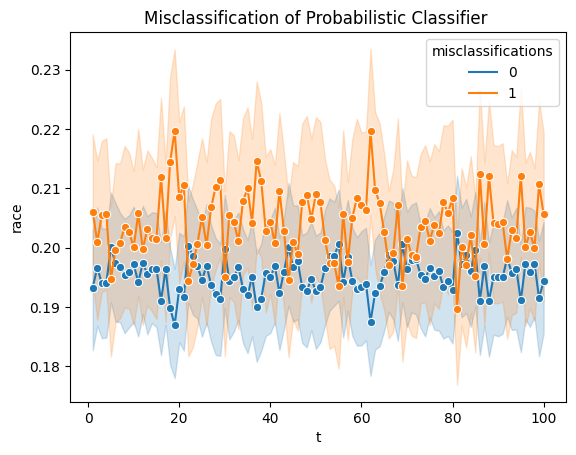

In [ ]:
viz(df_baseline2, df_baseline2.index.get_level_values('t'), df_baseline2['race'], abs(df_baseline2['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])


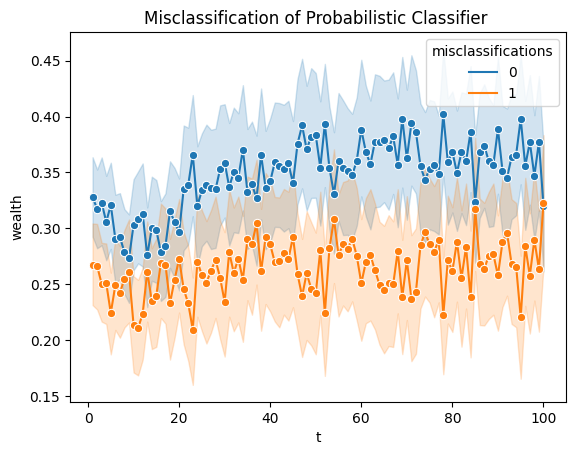

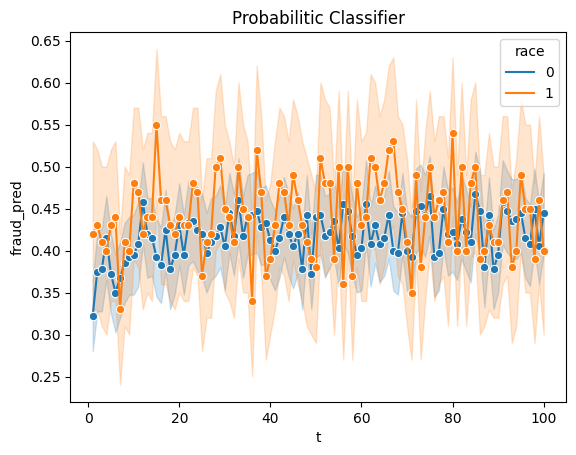

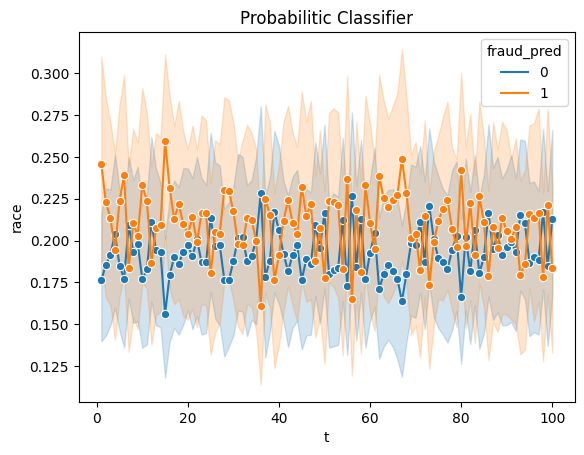

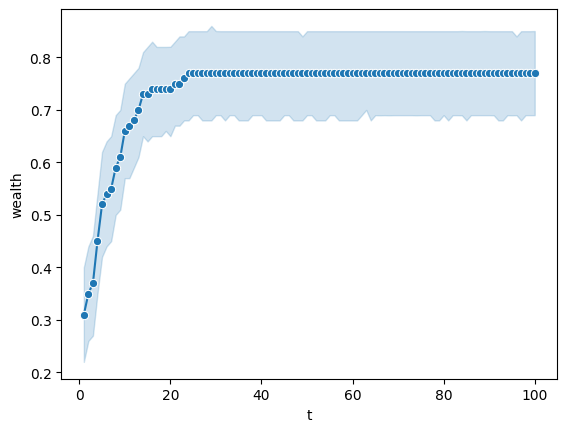

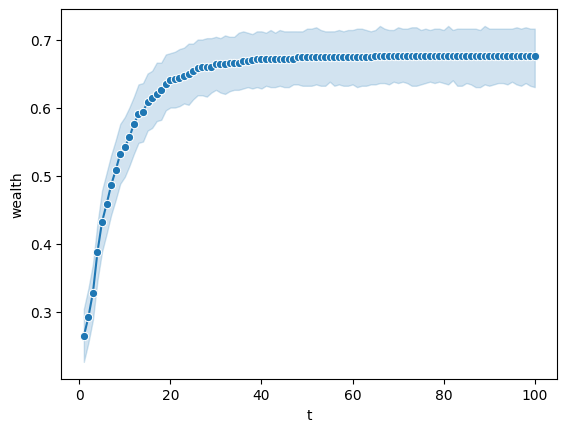

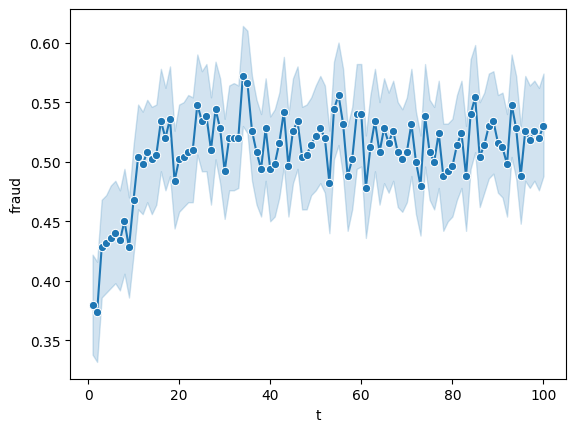

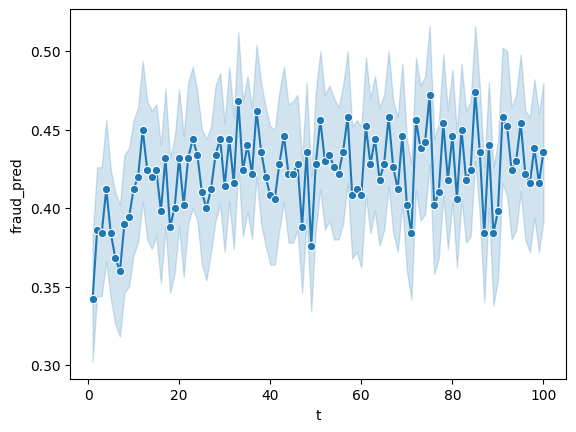

In [ ]:
viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], abs(df_b['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])

viz(df_b, df_b.index.get_level_values('t'), df_b['fraud_pred'], df_b['race'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])

viz(df_b, df_b.index.get_level_values('t'), df_b['race'], df_b['fraud_pred'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])


# viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], df_b['fraud'],title= 'Probabilitic Classifier') #, df_baseline['convicted'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth']<0.1)
viz2(df_b, df_b.index.get_level_values('t'), df_b['wealth']<0.1)
viz2(df_b, df_b.index.get_level_values('t'), df_b['fraud'])
viz2(df_b, df_b.index.get_level_values('t'), df_b['fraud_pred'])

# viz(df_baseline, df_baseline.index.get_level_values('t'), abs(df_baseline['fraud'] - df_baseline['fraud_pred']), df_baseline['race'])#, df_baseline['fraud'])

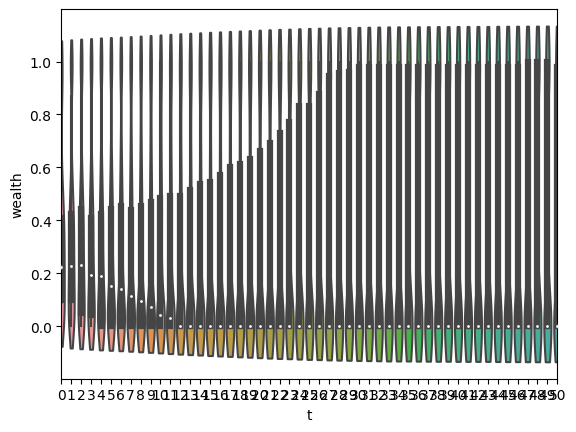

In [ ]:
fig, ax = plt.subplots()

sns.violinplot(ax = ax,
                data = df_b,
                x = df_b.index.get_level_values('t'),
                y = df_b['wealth'], cut = True)

# plt.ylim(0,0.2)
plt.xlim(0,50)
# plt.title(title)

plt.show()

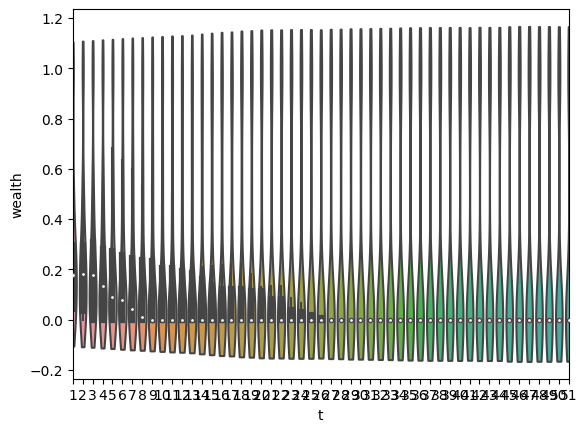

In [ ]:
fig, ax = plt.subplots()

sns.violinplot(ax = ax,
                data = df_baseline,
                x = df_baseline.index.get_level_values('t'),
                y = df_baseline['wealth'], cut = True)

# plt.ylim(0,0.2)
plt.xlim(0,50)
# plt.title(title)

plt.show()

In [ ]:

# fig, ax = plt.subplots()

# sns.lineplot(ax = ax,
#                 data = df_b,
#                 x = df_b.index.get_level_values('t'),
#                 y = df_b['wealth'],
#                 hue =df_b['fraud_pred'],
#                 marker = 'o' )

# sns.lineplot(ax = ax,
#                 data = df_b,
#                 x = df_b.index.get_level_values('t'),
#                 y = df_b['wealth'],
#                 hue =df_b['fraud'],
#                 marker = 'x' )

# # plt.ylim(0,0.2)
# plt.xlim(0,10)
# plt.title('title')

# # viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], df_b['fraud_pred']) #, df_baseline['convicted'])

# # viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], df_b['fraud']) #, df_baseline['convicted'])